# Phase III: Descriptive Statistics
Descriptive statistics in basketball analysis, using data from Basketball-Reference.com, offer a clear summary of player and team performance through key metrics. By calculating averages, variances, and distributions for stats like points, rebounds, and assists, analysts can uncover trends and patterns. This approach helps identify strengths, weaknesses, and areas for improvement. Ultimately, descriptive stats simplify complex data, providing valuable insights for coaches, players, and fans.

### Modules To Import

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Height Distribution Comparison: Michael Jordan Trophy Candidates vs. Top 50 Players (2019-2024)
The charts compare the height distribution of Michael Jordan Trophy candidates with the top 50 players per season (2019-2020 to 2023-2024). They show how player heights differ between these elite groups, highlighting trends in physical attributes among top performers.

In [10]:
data = pd.read_csv("data/Height_Distribution_MVPs_Top50.csv")
data.tail()

mvp_data = data[data['category'] == 'Michael Jordan Trophy']
mvp_data.head()

Rank50_data = data[data['category'] == 'Player Rank']


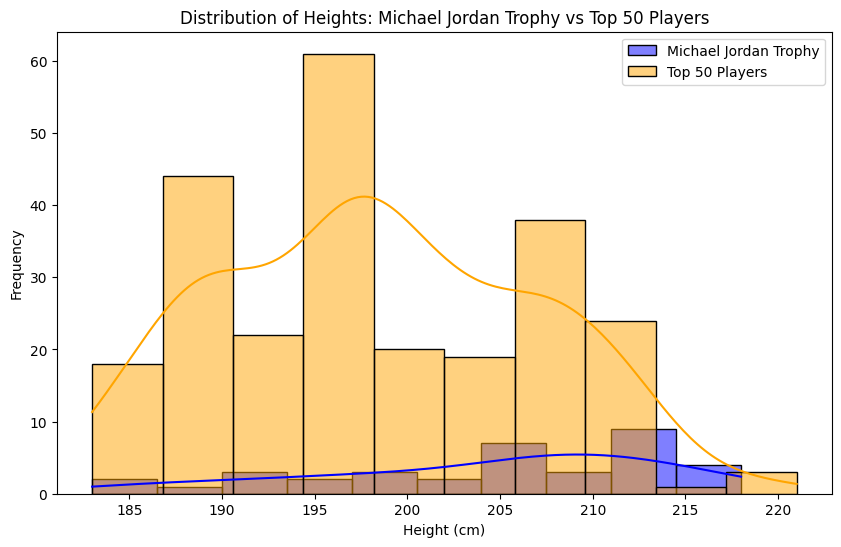

In [4]:
# Plotting histograms with a distribution curve using Seaborn
plt.figure(figsize=(10, 6))

# Plotting the histogram and distribution curve for Michael Jordan Trophy
sns.histplot(mvp_data['height_cm'], bins=10, kde=True, color='blue', label='Michael Jordan Trophy', alpha=0.5)

# Plotting the histogram and distribution curve for Top 50 Players
sns.histplot(Rank50_data['height_cm'], bins=10, kde=True, color='orange', label='Top 50 Players', alpha=0.5)

# Adding labels and title
plt.title('Distribution of Heights: Michael Jordan Trophy vs Top 50 Players')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()

# Displaying the plot
plt.show()






## 2. Experience and Height Comparison: Championship Team vs. Top 15 Players (Last Two Seasons)
The charts below compare the distribution of experience (years played) and height between the championship team and the top 15 players from the last two seasons. They highlight how the championship team's experience and height stack up against the league's elite performers, revealing potential trends in physical and experiential attributes that contribute to success.

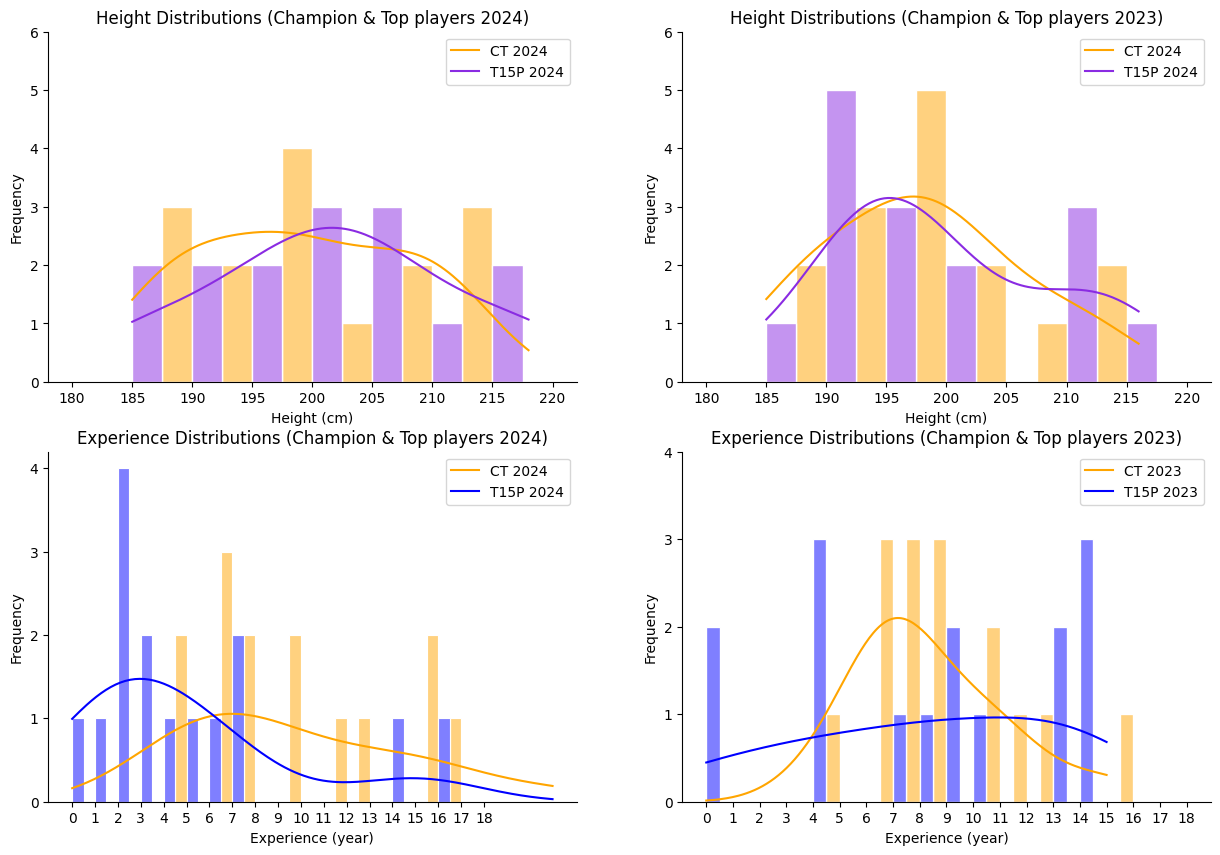

In [9]:
fig = plt.figure(figsize=(15, 10))
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 3)
axes3 = fig.add_subplot(2, 2, 2)
axes4 = fig.add_subplot(2, 2, 4)

data_champions = pd.read_csv('data/top_team_players_data.csv')
dc24_den = data_champions[data_champions['year']==2024][0:15]
dc23_bos = data_champions[data_champions['year']==2023][0:15]

top15player = pd.read_csv('data/top50players_data.csv')
t15p24 = top15player[top15player['year']==2024][0:15]
t15p23 = top15player[top15player['year']==2023][0:15]

dc24_den['Dataset'] = 'Champions Team 2024'
t15p24['Dataset'] = 'Top 15 Players 2024'

combined_data = pd.concat([dc24_den, t15p24])

binrange_height = [180, 220]
bin_width_height = 5
bins_height = np.arange(binrange_height[0], binrange_height[1] + bin_width_height, bin_width_height)

binrange_experience = [0, 18]
bin_width_experience = 1
bins_experience = np.arange(binrange_experience[0], binrange_experience[1] + bin_width_experience, bin_width_experience)

sns.histplot(data=combined_data, x='height_cm', hue='Dataset', kde=True, 
             binrange=binrange_height, bins=len(bins_height) - 1, ax=axes1, edgecolor='w', 
             multiple='dodge', palette=['blueviolet', 'orange'])

sns.histplot(data=combined_data, x='experience', hue='Dataset', kde=True, 
             binrange=binrange_experience, bins=len(bins_experience) - 1, ax=axes2, edgecolor='w', 
             multiple='dodge', palette=['blue', 'orange'])
max_freq_height = int(combined_data['height_cm'].value_counts().max()) 
max_freq_experience = int(combined_data['experience'].value_counts().max())  

dc23_bos['Dataset1'] = 'Champions Team 2024'
t15p23['Dataset1'] = 'Top 15 Players 2024'
combined_data = pd.concat([dc23_bos, t15p23])

binrange_height1 = [180, 220]
bin_width_height1 = 5
bins_height1 = np.arange(binrange_height[0], binrange_height[1] + bin_width_height, bin_width_height)

binrange_experience1 = [0, 18]
bin_width_experience1 = 1
bins_experience1 = np.arange(binrange_experience1[0], binrange_experience1[1] + bin_width_experience1, bin_width_experience1)

sns.histplot(data=combined_data, x='height_cm', hue='Dataset1', kde=True, 
             binrange=binrange_height1, bins=len(bins_height1) - 1, ax=axes3, edgecolor='w', 
             multiple='dodge', palette=['blueviolet', 'orange'])

sns.histplot(data=combined_data, x='experience', hue='Dataset1', kde=True, 
             binrange=binrange_experience1, bins=len(bins_experience1) - 1, ax=axes4, edgecolor='w', 
             multiple='dodge', palette=['blue', 'orange'])
max_freq_height1 = int(combined_data['height_cm'].value_counts().max()) 
max_freq_experience1 = int(combined_data['experience'].value_counts().max())  

axes1.set_yticks(np.arange(0, max_freq_height + 1, 1))  
axes1.legend(['CT 2024', 'T15P 2024'])
axes1.set_xlabel('Height (cm)')
axes1.set_ylabel('Frequency')
axes1.set_title('Height Distributions (Champion & Top players 2024)')
axes1.spines['top'].set_visible(False)
axes1.spines['right'].set_visible(False)
xticks1 = np.arange(binrange_height[0], binrange_height[1] + 1, 5)
axes1.set_xticks(xticks1)

axes2.legend(['CT 2024', 'T15P 2024'])
axes2.set_xlabel('Experience (year)')
axes2.set_ylabel('Frequency')
axes2.set_title('Experience Distributions (Champion & Top players 2024)')
axes2.spines['top'].set_visible(False)
axes2.spines['right'].set_visible(False)
xticks2 = np.arange(binrange_experience[0],binrange_experience[1]+1,1)
axes2.set_xticks(xticks2)
axes2.set_yticks(np.arange(0, max_freq_experience + 1, 1))  

axes3.set_yticks(np.arange(0, max_freq_height + 1, 1))  
axes3.legend(['CT 2024', 'T15P 2024'])
axes3.set_xlabel('Height (cm)')
axes3.set_ylabel('Frequency')
axes3.set_title('Height Distributions (Champion & Top players 2023)')
axes3.spines['top'].set_visible(False)
axes3.spines['right'].set_visible(False)
xticks3 = np.arange(binrange_height1[0], binrange_height1[1] + 1, 5)
axes3.set_xticks(xticks3)

axes4.legend(['CT 2023', 'T15P 2023'])
axes4.set_xlabel('Experience (year)')
axes4.set_ylabel('Frequency')
axes4.set_title('Experience Distributions (Champion & Top players 2023)')
axes4.spines['top'].set_visible(False)
axes4.spines['right'].set_visible(False)
xticks4 = np.arange(binrange_experience1[0],binrange_experience1[1]+1,1)
axes4.set_xticks(xticks4)
axes4.set_yticks(np.arange(0, max_freq_experience + 1, 1))  

plt.show()

## 3. Top Point Guards By Michael Jordan Trophy Nominations
This Data Frame ranks the top point guards based on their nominations for the Michael Jordan Trophy, highlighting their consistent excellence and impact on the game. It showcases the most elite playmakers recognized for their outstanding performances.

In [6]:
# Reading the CSV file
data = pd.read_csv("data/top_pointguard.csv")

# Sorting the data by 'nominations' in descending order and selecting the top 3 players
top_players = data.sort_values(by='nominations', ascending=False).head(3)

# Displaying the top 3 players along with their 'nominations'
print(top_players[['player_name', 'nominations']])


             player_name  nominations
0  Giannis Antetokounmpo            5
1            Luka Dončić            5
2           LeBron James            3
